# LIBRARIES AND DATA

In [20]:
#Libraries: i'm not even sure which one i'm using lol
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math 
import pylab
from scipy import stats
from scipy import interpolate
from scipy.interpolate import Rbf
# from scipy.stats import kurtosis, skew
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.interpolate import *

# TEST FOR BZY

In [42]:
# Testing with BZY
BZY = df.drop(df.index[df.SN1 != 'BZY'])
BZY.describe()

,SN2,Age_From_DBS,Age_From_Delivery,Combined_Age_Pro_Built_Year,Combined_Age_Pro_Delivery
count,403.000000,162.000000,103.000000,162.000000,162.000000
mean,1998.322581,73.259259,63.330097,73.259259,73.259259
std,889.841131,30.924383,30.777949,30.924383,30.924383
min,164.000000,24.000000,22.000000,24.000000,24.000000
25%,1080.000000,48.000000,33.000000,48.000000,48.000000
50%,2563.000000,84.000000,52.000000,84.000000,84.000000
75%,2743.500000,96.000000,94.000000,96.000000,96.000000
max,2855.000000,108.000000,107.000000,108.000000,108.000000


In [45]:
#Explore data
explore = BZY.drop([
'SerialNumber', 'ModelName', 'SN1',
       'Age_From_Delivery', 'Combined_Age_Pro_Built_Year',
       'Combined_Age_Pro_Delivery'
],axis=1)
# Correlation seems to confirm the theory, missing values are pretty high %
# import pandas_profiling as pp
# eda = pp.ProfileReport(BZY)
# display(eda)

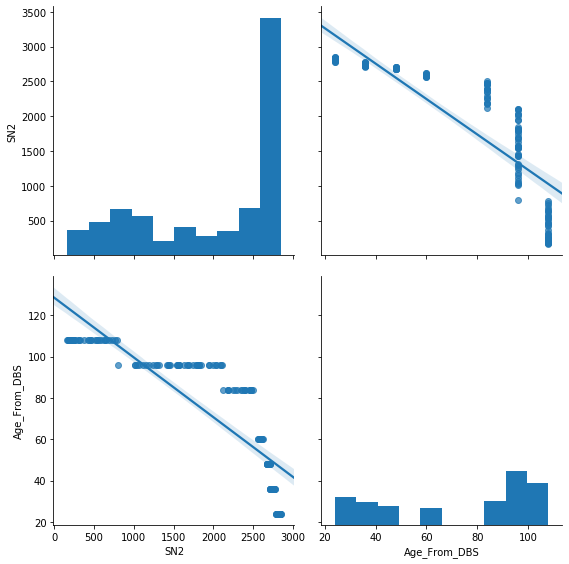

In [46]:
#From the scatter, i can tell this is not a linear relationship. After drawing a few more i decided to use interpolation \
#to compute predicted age.

sns.pairplot(explore, kind='reg', diag_kind='hist',
height=4, aspect=1,
plot_kws={'scatter_kws': {'alpha': 0.7}})

In [47]:
#DROP NA and convert to int for interp1d training
TRAIN = explore.dropna()

# D Convert to integer
X = TRAIN[['SN2']].squeeze()
X = X.astype(int)
Y = TRAIN[['Age_From_DBS']].squeeze()
Y = Y.astype(int)

In [48]:
# M
model = interp1d(X, Y,kind='linear',fill_value="extrapolate")
#Note.  At the end i will test different interpolation "kind" by comparing linear regression errors.
#Note2: kind: str or int, optional
# Specifies the kind of interpolation as a string (‘linear’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, ‘next’, where ‘zero’, ‘slinear’, ‘quadratic’ and ‘cubic’ refer to a spline interpolation of zeroth, first, second or third order; ‘previous’ and ‘next’ simply return the previous or next value of the point) or as an integer specifying the order of the spline interpolator to use. Default is ‘linear’.

In [49]:
# T
t1 = model(105) #cat starts built at 100
t2 = model(200) #probably same as 105
t3 = model(500) #probably same as 105 or maybe +1
t4 = model(731) #heavy rents own this one. I think it was like 2013
t5 = model(1000) #I think this is the start of production peak from business exp
t6 = model(1500) 
t7 = model(1848) #heavy rents own this one. I think it was 2015
t8 = model(2000)
t9 = model(2575) #heavy rents own this one. I think it was like 2016
t10 = model(10000) #i don't think cat actually built this many..
t11 = model(20000) #i don't think cat actually built this many.
t12 = model(50000) #i don't think cat actually built this many.
print(t1)
print(t2)
print(t3)
print(t4)
print(t5)
print(t6)
print(t7)
print(t8)
print(t9)
print(t10)
print(t11)
print(t12)

108.0
108.0
108.0
108.0
96.0
96.0
96.0
96.0
60.0
24.0
24.0
24.0


In [50]:
#There is one serial number 7292. Looks suspicious. I will drop SN2 and Age (x and Y \
# \individually)by 3 standard deviation.
#I convereted Train to int but exlore still has them in float so i can calculate Z score and reduce sample
NEW_TRAIN = TRAIN[(np.abs(stats.zscore(TRAIN)) < 3).all(axis=1)]
NEW_TRAIN.describe()

,SN2,Age_From_DBS
count,162.000000,162.000000
mean,1909.691358,73.259259
std,916.629305,30.924383
min,164.000000,24.000000
25%,1199.750000,48.000000
50%,2278.500000,84.000000
75%,2711.750000,96.000000
max,2844.000000,108.000000


In [51]:
# #DROP NA and convert to int for interp1d training
X = NEW_TRAIN[['SN2']].squeeze()
X = X.astype(int)
Y = NEW_TRAIN[['Age_From_DBS']].squeeze()
Y = Y.astype(int)

In [52]:
# M
model = interp1d(X, Y,kind='linear',fill_value="extrapolate")

In [53]:
# T
t1 = model(105) #cat starts built at 100
t2 = model(200) #probably same as 105
t3 = model(500) #probably same as 105 or maybe +1
t4 = model(731) #heavy rents own this one. I think it was like 2013
t5 = model(1000) #I think this is the start of production peak from business exp
t6 = model(1500) 
t7 = model(1848) #heavy rents own this one. I think it was 2015
t8 = model(2000)
t9 = model(2575) #heavy rents own this one. I think it was like 2016
t10 = model(10000) #i don't think cat actually built this many..
t11 = model(20000) #i don't think cat actually built this many.
t12 = model(50000) #i don't think cat actually built this many.
print(t1)
print(t2)
print(t3)
print(t4)
print(t5)
print(t6)
print(t7)
print(t8)
print(t9)
print(t10)
print(t11)
print(t12)

#I thought i convereted them into integer? whatever

108.0
108.0
108.0
108.0
96.0
96.0
96.0
96.0
60.0
24.0
24.0
24.0


In [54]:
# THANK YOU SO MUCH YOYO!
for idx in BZY.index.values:
    BZY.loc[idx, 'Predicted_Age_By_DBS_Year'] = model(BZY.loc[idx, 'SN2'])

In [55]:
#Visual test passed. Next step is to loop different prefixes
BZY.to_csv('..\\data\\Output\\BZY_Interpolation_Age_Result_Pro_Delivery.csv')

# LOOP FOR MULTIPLE PREFIX

In [92]:
df = pd.read_excel('..\\data\\EquipmentAge.xlsx', index_col='EquipmentCode')
#Create list for loop. I only need to build prefix number of models
prefix = list(dict.fromkeys(list(df['SN1'])))
print('Tasks list:',prefix)

#Clone df for output df
output = df
output.shape

#DS:Create a blank df for the base of merging the OUTPUTs
#output_prediction = pd.DataFrame(index=output.index ,columns=['Predicted_Age_By_DBS_Year','Predicted_Age_By_Delivery','Predicted_Age_Combined_Pro_Delivery'])
output_prediction = pd.DataFrame()

for x in prefix:   #while loopingthrough prefix, delete all other prefix
#     print('Starting prefix:',x)
    TEST = output.drop(output.index[output.SN1 != x])

    OUTPUT = TEST
    EXPLORE1 = TEST.drop(['SerialNumber', 'ModelName', 'SN1',
           'Age_From_Delivery', 'Combined_Age_Pro_Built_Year','Combined_Age_Pro_Delivery'],axis=1) 

    TRAIN1 = EXPLORE1.dropna()

#     print('Filter data by 3 standard deviation')
    
    NEW_TRAIN1 = TRAIN1[(np.abs(stats.zscore(TRAIN1)) < 3).all(axis=1)]


#     print('NT1 size:',NEW_TRAIN1.shape)
#     print('NT2 size:',NEW_TRAIN2.shape)
#     print('NT3 size:',NEW_TRAIN3.shape)
#     print(NEW_TRAIN3.columns)
#     print('Data Loaded')    
    
    X1 = TRAIN1[['SN2']].squeeze()
    X1 = X1.astype(int)    
    Y1 = TRAIN1[['Age_From_DBS']].squeeze() / 12
    Y1 = Y1.astype(int)
    

#     print('Start Training')
    
    if NEW_TRAIN1.size > 0:
        model1 = interp1d(X1, Y1,kind='linear',fill_value="extrapolate")
        ###Note: In order to calculate more sensible DBS year, train with Year
        
#     print('Training coplete')
    
    for idx in OUTPUT.index.values:
        if NEW_TRAIN1.size > 0:
            OUTPUT.loc[idx, 'Predicted_Age_By_DBS_Year'] = model1(OUTPUT.loc[idx, 'SN2'])

#     print('prefix estimation complete')
        
#     print(OUTPUT.describe)    
#     print('Starting to merge data')
        
    #DS: I decided to use append instead. Commented out reset_index because I don't know if you need the EquipmentCode
    output_prediction = output_prediction.append([OUTPUT])
    output_prediction = output_prediction.drop_duplicates()#.reset_index(drop=True)
    
#     print('Prefix estimation complete, data loaded to output, move on to next prefix')
    
print('All estimation completed. Ready to export')
output_prediction.to_csv('..\\data\\Output\\Age_Predict.csv')
print('export completed')

Tasks list: ['N1A', 'N4A', 'N8F', 'N9D', 'N9J', 'N9L', 'N9M', 'N9S', 'N9T', 'NAD', 'NAS', 'NAZ', 'NBE', 'NBT', 'NDC', 'NDJ', 'NJ9', 'NJB', 'NJN', 'NLC', 'NLK', 'NOV', 'NPF', 'NSL', 'P1C', 'P3W', 'P56', 'P6K', 'P8L', 'P8P', 'PAB', '0PA', 'PAC', 'PAK', 'PAL', 'PAN', 'PAP', 'PAT', 'PBA', 'PBG', 'PBM', 'PCA', 'PDF', 'PDT', 'PED', 'PER', 'PF4', 'PFB', 'PFS', 'PHC', 'PHD', 'PHX', 'PJF', 'PJW', 'PLR', 'PLW', 'PMT', 'PNJ', 'PNM', 'PNW', 'PRA', 'PTY', 'PWP', 'PWR', 'PYT', 'PZL', 'R4A', 'R8D', 'R9B', 'R9G', 'R9H', 'R9J', 'R9L', 'R9M', 'R9P', 'R9T', 'RAD', 'RAJ', 'RAX', 'RAZ', 'RBA', 'RBG', 'RBR', 'RCD', 'RCW', 'RCX', 'RDF', 'RDR', 'RED', 'REE', 'REH', 'REP', 'REX', 'RFM', 'RGS', 'RH4', 'RHN', 'RHX', 'RJG', 'RJN', '1YR', 'RJS', 'RKB', '1YS', 'RKG', 'RLB', 'RLL', 'RLN', 'RLW', 'RMX', '0RM', 'RRE', 'RRR', 'RSL', 'RST', 'RTA', 'RTB', 'RYF', 'RZA', 'SAH', 201, 202, 205, '20A', '20X', 'SBR', '20Z', 'SCD', 'SCG', 'SCH', 'SCL', 'SCP', 'SCR', 'SDH', 214, '7DM', 'TFB', 'SWL', 'HNG', '3T6', 'GSF', 'BXY', '

C:\Users\julianyang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in less
C:\Users\julianyang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in less
C:\Users\julianyang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in less


All estimation completed. Ready to export
export completed


# TEST RESULTS

In [93]:
tt = output_prediction.drop(['SerialNumber','ModelName','SN1','SN2'],axis=1)
tt.columns

Index(['Age_From_DBS', 'Age_From_Delivery', 'Combined_Age_Pro_Built_Year',
       'Combined_Age_Pro_Delivery', 'Predicted_Age_By_DBS_Year',
       'Predicted_Age_Combined_Pro_Built_Year',
       'Predicted_Age_Combined_Pro_Delivery'],
      dtype='object')

In [96]:
test1 = tt.drop(['Age_From_Delivery','Combined_Age_Pro_Built_Year','Combined_Age_Pro_Delivery','Predicted_Age_Combined_Pro_Delivery','Predicted_Age_Combined_Pro_Built_Year'],axis=1)
test1 = test1.dropna()
X1 = test1[['Predicted_Age_By_DBS_Year']].squeeze()
Y1 = test1[['Age_From_DBS']].squeeze()
# create a OLS model.
model = sm.OLS(Y1, X1)

#Print
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:           Age_From_DBS   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.546e+11
Date:                Fri, 22 May 2020   Prob (F-statistic):                        0.00
Time:                        14:52:45   Log-Likelihood:                          46198.
No. Observations:               34850   AIC:                                 -9.239e+04
Df Residuals:                   34849   BIC:                                 -9.239e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

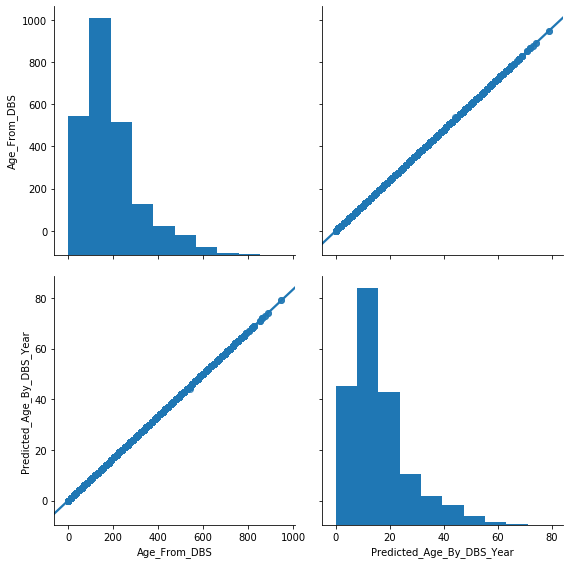

In [97]:
sns.pairplot(test1, kind='reg', diag_kind='hist',
             height=4, aspect=1,
             plot_kws={'scatter_kws': {'alpha': 0.7}})

In [102]:
test2 = tt.drop(['Age_From_Delivery','Combined_Age_Pro_Built_Year','Combined_Age_Pro_Delivery','Predicted_Age_By_DBS_Year','Predicted_Age_Combined_Pro_Delivery'],axis=1)
test2 = test2.dropna()
X2 = test2[['Predicted_Age_Combined_Pro_Built_Year']].squeeze()
Y2 = test2[['Age_From_DBS']].squeeze()
# create a OLS model.
model2 = sm.OLS(Y2, X2)

#Print
results2 = model.fit()
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:           Age_From_DBS   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          4.408e+07
Date:                Fri, 22 May 2020   Prob (F-statistic):                        0.00
Time:                        14:56:51   Log-Likelihood:                     -1.1482e+05
No. Observations:               34850   AIC:                                  2.296e+05
Df Residuals:                   34849   BIC:                                  2.296e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------

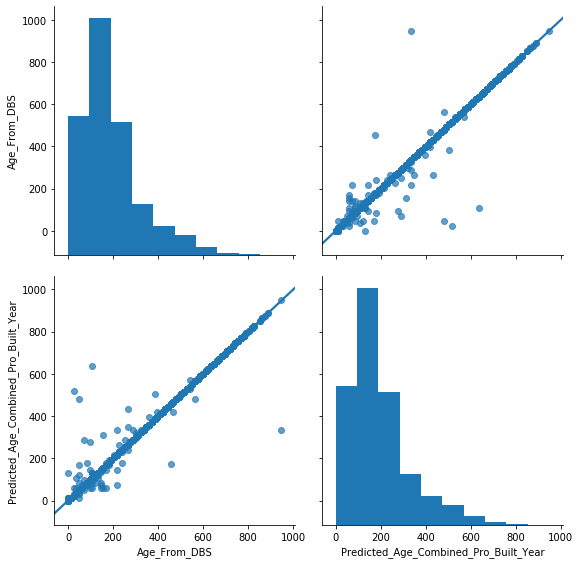

In [103]:
sns.pairplot(test2, kind='reg', diag_kind='hist',
             height=4, aspect=1,
             plot_kws={'scatter_kws': {'alpha': 0.7}})